In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)
og=pd.read_csv('CrabAgePrediction.csv')

# Comparision between Train Test and OG Dataset

In [3]:
og.columns == train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

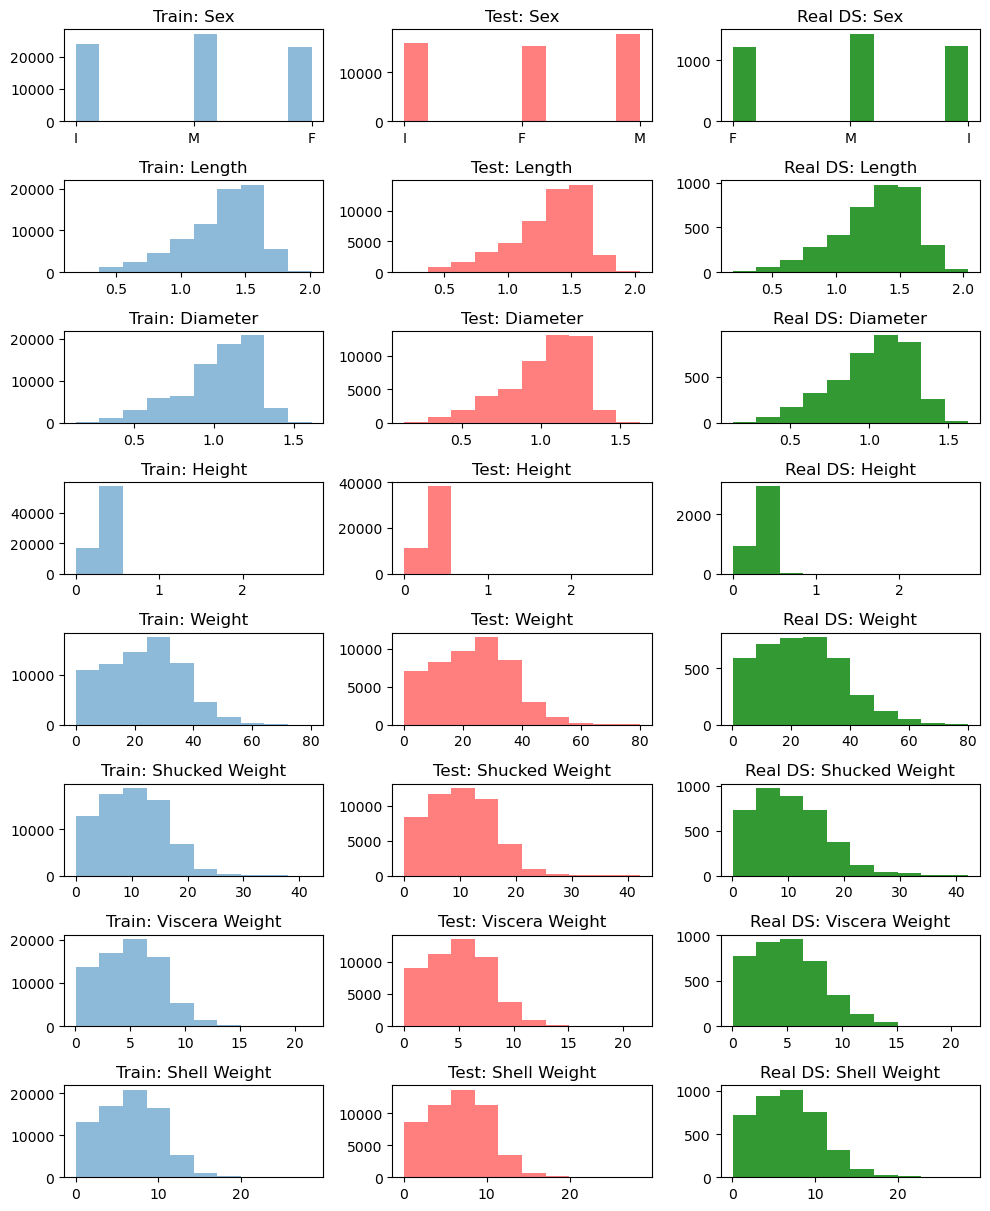

In [4]:
# Testing Distribution

cols=test.columns

x=1
y=2
z=3
plt.figure(figsize=(10,15))

for col in cols:
#     print(x,y,z)

    plt.subplot(10,3,x)
    plt.hist(train[col],alpha=.5)
    plt.title(f'Train: {col}')
    x = z+1
    
    plt.subplot(10,3,y)
    plt.hist(test[col],color='red',alpha=.5)
    plt.title(f'Test: {col}')
    y =y+3
    
    plt.subplot(10,3,z)
    plt.hist(og[col],color='green',alpha=.8)
    plt.title(f'Real DS: {col}')
    z+=3
#     print(x,y)
#     plt.subplot(10,2,y)
# train.hist()

plt.tight_layout()
plt.show()

<li><b>Test and train set usual same distribution and close to real data set

In [5]:
rows_t,col_t=train.shape
rows_tst,col_tst=test.shape
rows_og,col_og=og.shape


print("Train")
print(f'Rows: {rows_t}\nColumns: {col_t}\n')

print("Test")
print(f'Rows: {rows_tst}\nColumns: {col_tst}\n')

print('Real')
print(f'Rows: {rows_og}\nColumns: {col_og}')


Train
Rows: 74051
Columns: 9

Test
Rows: 49368
Columns: 8

Real
Rows: 3893
Columns: 9


# Profile Report

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [7]:
import ydata_profiling
ydata_profiling.ProfileReport(train).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
train.describe()

Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age  
count    74051.000000  74051.000000  74051.000000  
mean         5.058386      6.723870      9.967806  
std          2.792729      3.584372      3.175189  
min          0.042524      0.042524      1.000000  
25%          2.863300      3.968930      8.000000  
50%          4.989512      6.931453     10.000000  
75%          6.988152      9.071840     11.000000  
max         21.545620     28.491248     29.000000

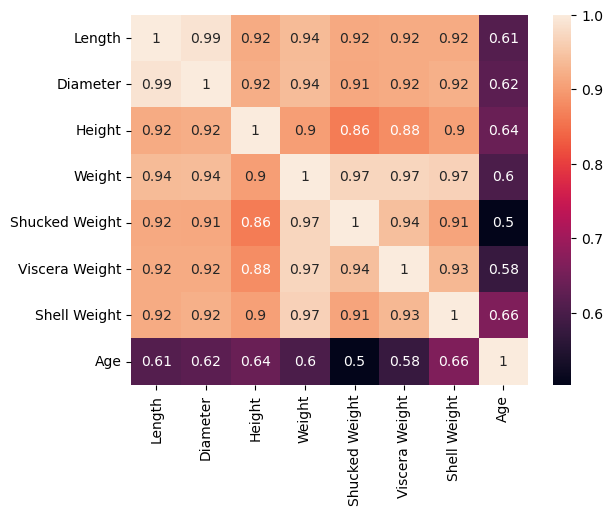

In [9]:
import seaborn as sns

corr=train.corr()
sns.heatmap(corr,annot=True)
plt.show()

<ul><li><p>The columns <code>Length</code>, <code>Diameter</code>, <code>Height</code>, <code>Weight</code>, <code>Viscera Weight</code>, and <code>Shell Weight</code> all have positive correlations with age. This means that as these values increase, the age tends to increase as well, although the strength of the relationship varies.</p></li><li><p>Among these columns, <code>Shell Weight</code> shows the highest positive correlation with age (0.663473), followed by <code>Height</code> (0.638067), <code>Diameter</code> (0.621256), and <code>Length</code> (0.612843). These variables have a moderately positive linear relationship with age.</p></li><li><p>The columns <code>Shucked Weight</code> and <code>Viscera Weight</code> also have positive correlations, but their magnitudes are relatively lower compared to the other variables.</p></li><li><p>The column <code>id</code> has very weak correlations with all the other variables, including age, as its correlation coefficients are close to zero.</p></li></ul>

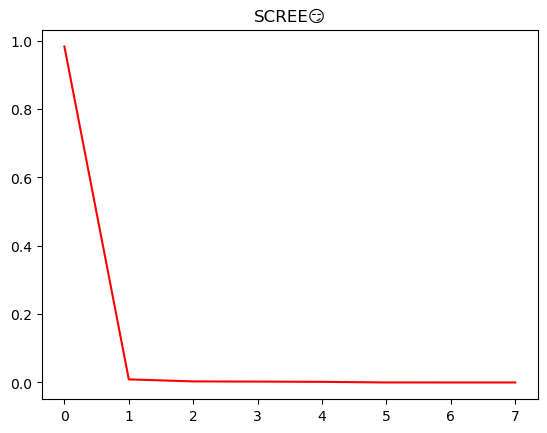

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder



X=train.drop('Age',axis=1)
X['Sex']=LabelEncoder().fit_transform(X['Sex'])
pc=PCA()
pc.fit(X)

plt.plot(pc.explained_variance_ratio_,c='r')
plt.title('SCREE😏')
plt.show()

In [11]:

pca=PCA(2)
pca.fit(X)

x_dr=pca.transform(X)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

x_train,x_test,y_train,y_test=train_test_split(x_dr,train.Age)

lr=LinearRegression()

lr.fit(x_train,y_train)
lr.score(x_test,y_test)

print(f'MAE: {mean_absolute_error(y_test,lr.predict(x_test))}')

MAE: 1.5851258378914177


In [12]:
test['Sex']=LabelEncoder().fit_transform(test['Sex'])
dr=pca.transform(test)
sub=lr.predict(dr)

df = pd.DataFrame({'Age': sub}, index=test.index)
df.to_csv('submission.csv',index=True)